In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

# TRAIN

In [2]:
for i in range(45):
    if i==0:
        train = pd.read_csv('salida/resultados/SICK/TRAIN_'+str(i+1)+'.csv.csv')
    else:
        try:
            temp = pd.read_csv('salida/resultados/SICK/TRAIN_'+str(i+1)+'.csv.csv')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,wmd,CLASS
0,0.256181,133.77597,1.000,0.685520,99.653711,0.710647,0,1,0.544880,1,11.704617,CONTRADICTION
1,0.159525,360.27570,2.000,1.381420,228.584428,0.517641,0,1,0.253615,0,13.772540,CONTRADICTION
2,0.079613,170.33334,1.585,0.682195,69.551612,0.710647,0,1,0.575199,1,21.372192,ENTAILMENT
3,0.087863,704.00780,2.171,3.503575,840.385908,0.976367,0,0,0.177042,0,40.641668,CONTRADICTION
4,0.326782,1163.83970,2.546,3.445120,769.680563,2.041023,1,1,0.631756,2,34.955648,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...
2534,0.924950,741.48150,2.922,4.018965,4.146894,0.135612,0,0,0.177094,1,43.522331,CONTRADICTION
2535,2.549616,1104.10660,3.750,3.974135,5.025132,0.363223,0,0,0.407879,2,26.840997,CONTRADICTION
2536,3.959935,1601.92350,4.502,3.956678,8.249232,0.265449,1,0,0.437829,2,41.399792,CONTRADICTION
2537,1.804459,543.06150,3.000,4.077876,3.171687,0.401213,0,0,0.369778,1,24.597390,CONTRADICTION


In [4]:
train["bandera"]=-1
temp=train.copy()
for index, strings  in temp.iterrows():
    if strings["wmd"]==0.0:
        train.at[index,"bandera"]=1

In [5]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,wmd,CLASS,bandera
0,0.256181,133.77597,1.000,0.685520,99.653711,0.710647,0,1,0.544880,1,11.704617,CONTRADICTION,-1
1,0.159525,360.27570,2.000,1.381420,228.584428,0.517641,0,1,0.253615,0,13.772540,CONTRADICTION,-1
2,0.079613,170.33334,1.585,0.682195,69.551612,0.710647,0,1,0.575199,1,21.372192,ENTAILMENT,-1
3,0.087863,704.00780,2.171,3.503575,840.385908,0.976367,0,0,0.177042,0,40.641668,CONTRADICTION,-1
4,0.326782,1163.83970,2.546,3.445120,769.680563,2.041023,1,1,0.631756,2,34.955648,CONTRADICTION,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,0.924950,741.48150,2.922,4.018965,4.146894,0.135612,0,0,0.177094,1,43.522331,CONTRADICTION,-1
2535,2.549616,1104.10660,3.750,3.974135,5.025132,0.363223,0,0,0.407879,2,26.840997,CONTRADICTION,-1
2536,3.959935,1601.92350,4.502,3.956678,8.249232,0.265449,1,0,0.437829,2,41.399792,CONTRADICTION,-1
2537,1.804459,543.06150,3.000,4.077876,3.171687,0.401213,0,0,0.369778,1,24.597390,CONTRADICTION,-1


In [6]:
#train["inc_sem"]=train["incompatibilidad"]+train["antonimos"]+train["relaciones"]

<Axes: title={'center': 'suma'}, xlabel='CLASS'>

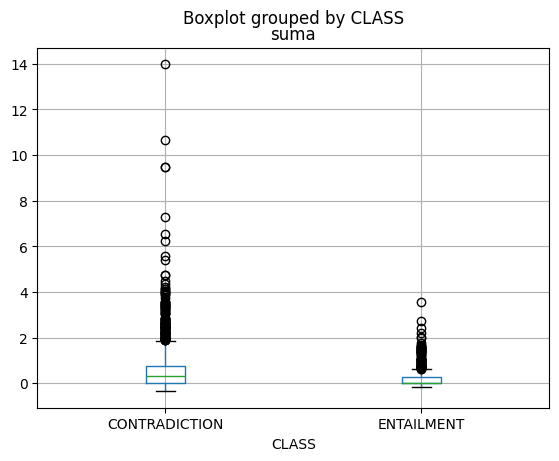

In [7]:
train.boxplot(by="CLASS",column=["suma"])

<Axes: title={'center': 'suma'}, xlabel='CLASS'>

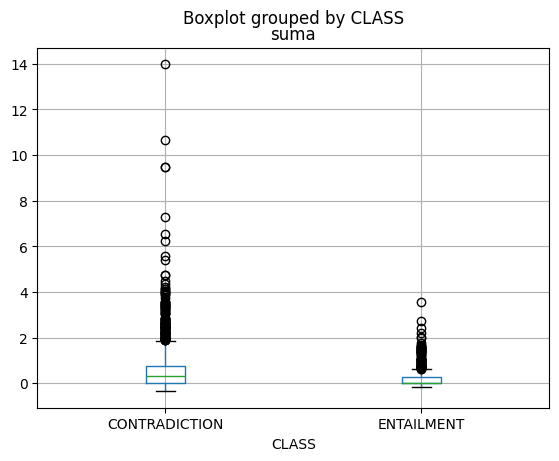

In [8]:
train.boxplot(by="CLASS",column=["suma"])

In [9]:
#train=train.drop(["sim_faltantes","distancias","suma","antonimos","incompatibilidad","wmd"],axis=1)
#train=train.drop(["incompatibilidad"],axis=1)
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,wmd,CLASS,bandera
0,0.256181,133.77597,1.000,0.685520,99.653711,0.710647,0,1,0.544880,1,11.704617,CONTRADICTION,-1
1,0.159525,360.27570,2.000,1.381420,228.584428,0.517641,0,1,0.253615,0,13.772540,CONTRADICTION,-1
2,0.079613,170.33334,1.585,0.682195,69.551612,0.710647,0,1,0.575199,1,21.372192,ENTAILMENT,-1
3,0.087863,704.00780,2.171,3.503575,840.385908,0.976367,0,0,0.177042,0,40.641668,CONTRADICTION,-1
4,0.326782,1163.83970,2.546,3.445120,769.680563,2.041023,1,1,0.631756,2,34.955648,CONTRADICTION,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,0.924950,741.48150,2.922,4.018965,4.146894,0.135612,0,0,0.177094,1,43.522331,CONTRADICTION,-1
2535,2.549616,1104.10660,3.750,3.974135,5.025132,0.363223,0,0,0.407879,2,26.840997,CONTRADICTION,-1
2536,3.959935,1601.92350,4.502,3.956678,8.249232,0.265449,1,0,0.437829,2,41.399792,CONTRADICTION,-1
2537,1.804459,543.06150,3.000,4.077876,3.171687,0.401213,0,0,0.369778,1,24.597390,CONTRADICTION,-1


In [10]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [11]:
# SICK
y_train=[]
for i in y_:
    if i == "ENTAILMENT":
        y_train.append(1)
    else:
        y_train.append(0)

In [12]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

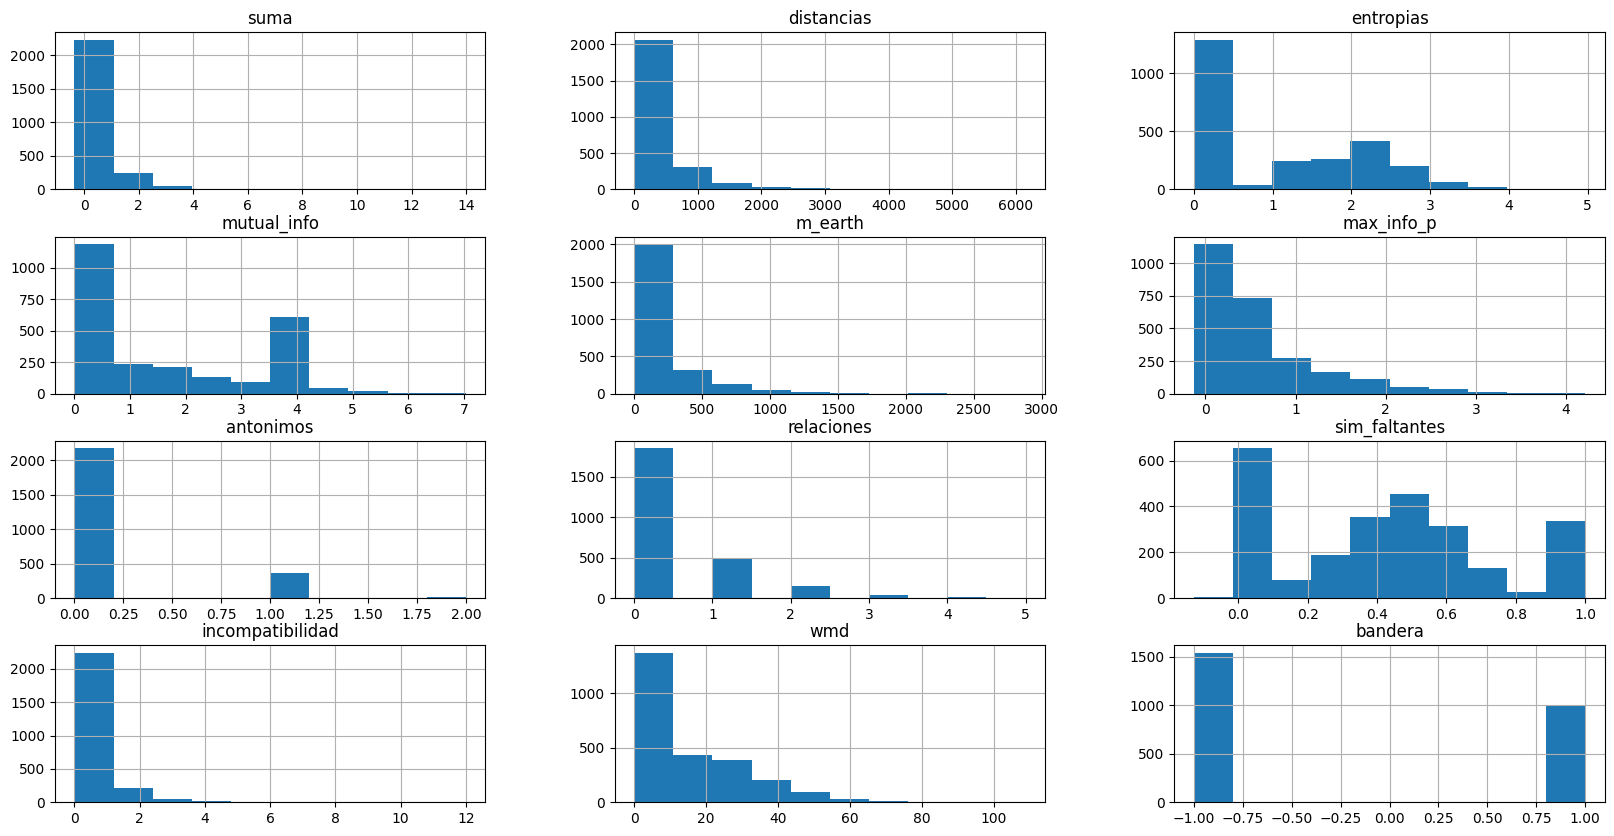

In [13]:
train.hist(figsize=(20,10))
plt.show()

# DEV

In [14]:
for i in range(5):
    if i==0:
        dev = pd.read_csv('salida/resultados/SICK/DEV_'+str(i+1)+'.csv.csv')
    else:
        try:
            temp = pd.read_csv('salida/resultados/SICK/DEV_'+str(i+1)+'.csv.csv')
            dev=pd.concat([dev,temp])
        except:
            pass

In [15]:
#dev["inc_sem"]=dev["incompatibilidad"]+dev["antonimos"]+dev["relaciones"]

In [16]:
#dev=dev.drop(["sim_faltantes","distancias","suma","antonimos","incompatibilidad","wmd"],axis=1)
#dev=dev.drop(["incompatibilidad"],axis=1)
dev

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,wmd,CLASS
0,0.517381,239.797780,0.000,1.368566,273.622679,0.557043,0,0,0.352328,0,16.315557,CONTRADICTION
1,0.653972,1350.344600,2.338,3.471361,506.238876,2.614866,0,2,0.660948,1,37.335748,CONTRADICTION
2,0.655023,361.275360,2.252,2.142661,268.390853,1.252807,0,1,0.580260,1,22.793291,CONTRADICTION
3,1.077954,1020.321960,2.390,3.528014,867.636031,2.360747,0,2,0.611783,3,29.323655,CONTRADICTION
4,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,0.000000,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.643448,35.167053,0.000,0.694004,36.702941,0.643448,0,0,0.643448,1,4.942187,CONTRADICTION
96,0.104718,584.677200,2.156,2.756026,458.686066,0.674628,0,0,0.152289,1,34.086455,CONTRADICTION
97,0.351284,48.955402,0.000,0.707871,39.387003,0.351284,0,0,0.351284,1,8.572803,CONTRADICTION
98,0.090328,265.350920,2.000,0.713348,102.432591,0.628566,0,0,0.467778,0,34.930723,CONTRADICTION


In [17]:
dev["bandera"]=-1
temp=dev.copy()
for index, strings  in temp.iterrows():
    if strings["wmd"]==0.0:
        dev.at[index,"bandera"]=1

In [18]:
X_dev = np.array(dev.drop(['CLASS'],axis=1))
y_d = np.array(dev['CLASS'])

In [19]:
# SICK
y_dev=[]
for i in y_d:
    if i == "ENTAILMENT":
        y_dev.append(1)
    else:
        y_dev.append(0)

In [20]:
scaler = preprocessing.StandardScaler().fit(X_dev)
X_scaled = scaler.transform(X_dev)
X_dev = X_scaled

# TEST

In [21]:
for i in range(50):
    if i==3:
        test = pd.read_csv('salida/resultados/SICK/TEST_'+str(i+1)+'.csv.csv')
    else:
        try:
            temp = pd.read_csv('salida/resultados/SICK/TEST_'+str(i+1)+'.csv.csv')
            test=pd.concat([test,temp])
        except:
            pass

In [22]:
#test["inc_sem"]=test["incompatibilidad"]+test["antonimos"]+test["relaciones"]

In [23]:
#test=test.drop(["sim_faltantes","distancias","suma","antonimos","incompatibilidad","wmd"],axis=1)
#test=test.drop(["incompatibilidad"],axis=1)
test

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,wmd,CLASS
0,5.154571,897.30360,3.590,3.965996,5.103063,0.618290,0,1,0.635987,2,24.421643,CONTRADICTION
1,3.976356,1018.00854,3.774,3.964317,5.491913,0.393931,0,1,0.523656,2,22.685989,CONTRADICTION
2,3.543036,713.18260,3.585,4.061026,4.231514,0.595314,0,1,0.528124,3,32.347248,CONTRADICTION
3,1.137191,252.04712,2.000,4.051754,1.759429,0.565958,1,0,0.410047,0,16.926805,CONTRADICTION
4,2.884681,390.66140,3.000,3.985684,2.470385,0.436993,0,0,0.584288,1,31.811380,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...
1,0.447379,1145.02000,2.671,2.781929,443.412710,1.756696,0,1,0.533970,1,31.648969,CONTRADICTION
2,0.136075,940.45905,1.888,2.074558,667.539646,0.832233,0,1,0.325274,0,34.991643,CONTRADICTION
3,-0.153117,1347.91210,2.195,3.491179,922.490049,1.232683,0,3,0.194228,1,39.286091,CONTRADICTION
4,0.341457,4568.51560,2.383,5.572761,1375.779166,3.162525,0,2,0.589734,2,53.704392,CONTRADICTION


In [24]:
test["bandera"]=-1
temp=test.copy()
for index, strings  in temp.iterrows():
    if strings["wmd"]==0.0:
        test.at[index,"bandera"]=1

In [25]:
test.CLASS.unique()

array(['CONTRADICTION', 'ENTAILMENT'], dtype=object)

In [26]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [27]:
# SICK
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [28]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [29]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [30]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [31]:
model.decision_function(X)

array([-0.22824117, -1.50236771, -0.17467369, ..., -8.26056263,
       -3.542363  , -3.11124414])

In [32]:
labels=train.columns[:-1]
labels

Index(['suma', 'distancias', 'entropias', 'mutual_info', 'm_earth',
       'max_info_p', 'antonimos', 'relaciones', 'sim_faltantes',
       'incompatibilidad', 'wmd', 'CLASS'],
      dtype='object')

In [33]:
model.classes_

array([0, 1])

In [34]:
model.coef_[0]

array([-0.23022473, -0.44588566, -0.66380393, -0.45882052, -1.23566359,
        0.09658849, -0.97588159,  0.8658694 , -0.05144285, -0.12590166,
        0.42812613,  0.20400462])

In [35]:
coeficientes=model.coef_[0]

In [36]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  7 relaciones 4 m_earth


In [37]:
n_columns=train.shape[1]-1

In [38]:
n_columns

12

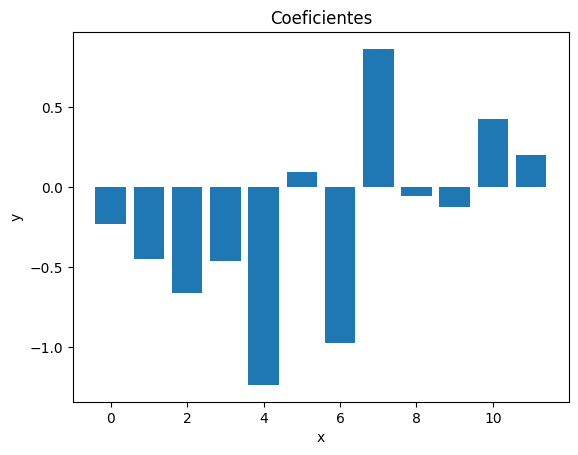

In [39]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [40]:
predictions = model.predict(X_dev)

In [41]:
print(confusion_matrix(y_dev, predictions))

[[57 19]
 [ 9 15]]


In [42]:
print(confusion_matrix(y_dev, predictions))

[[57 19]
 [ 9 15]]


In [43]:
print("acccuracy: ",round(accuracy_score(y_dev,predictions),2))
print("precision: ",round(precision_score(y_dev,predictions),2))
print("recall",round(recall_score(y_dev,predictions),2))
print("f1_score: ",round(f1_score(y_dev,predictions),2))

acccuracy:  0.72
precision:  0.44
recall 0.62
f1_score:  0.52


In [44]:
print("acccuracy: ",round(accuracy_score(y_dev,predictions),2))
print("precision: ",round(precision_score(y_dev,predictions),2))
print("recall",round(recall_score(y_dev,predictions),2))
print("f1_score: ",round(f1_score(y_dev,predictions),2))

acccuracy:  0.72
precision:  0.44
recall 0.62
f1_score:  0.52


In [45]:
predictions = model.predict(X_test)

In [46]:
print(confusion_matrix(y_test, predictions))

[[1897   41]
 [ 723   45]]


In [47]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.72
precision:  0.52
recall 0.06
f1_score:  0.11
matthews_score:  0.1


In [48]:
X_train.shape

(2539, 12)

In [49]:
X_test.shape

(2706, 12)

In [50]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [51]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [76]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.550000 (0.061037)
Logistic Regression: 0.590000 (0.120381)
Logistic Regression: 0.560000 (0.053997)


In [53]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.390000 (0.061411)


# SHAP

In [54]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [55]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [56]:
train.reset_index(drop=True)

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,wmd,CLASS,bandera
0,0.256181,133.77597,1.000,0.685520,99.653711,0.710647,0,1,0.544880,1,11.704617,CONTRADICTION,-1
1,0.159525,360.27570,2.000,1.381420,228.584428,0.517641,0,1,0.253615,0,13.772540,CONTRADICTION,-1
2,0.079613,170.33334,1.585,0.682195,69.551612,0.710647,0,1,0.575199,1,21.372192,ENTAILMENT,-1
3,0.087863,704.00780,2.171,3.503575,840.385908,0.976367,0,0,0.177042,0,40.641668,CONTRADICTION,-1
4,0.326782,1163.83970,2.546,3.445120,769.680563,2.041023,1,1,0.631756,2,34.955648,CONTRADICTION,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,0.924950,741.48150,2.922,4.018965,4.146894,0.135612,0,0,0.177094,1,43.522331,CONTRADICTION,-1
2535,2.549616,1104.10660,3.750,3.974135,5.025132,0.363223,0,0,0.407879,2,26.840997,CONTRADICTION,-1
2536,3.959935,1601.92350,4.502,3.956678,8.249232,0.265449,1,0,0.437829,2,41.399792,CONTRADICTION,-1
2537,1.804459,543.06150,3.000,4.077876,3.171687,0.401213,0,0,0.369778,1,24.597390,CONTRADICTION,-1


In [57]:
X = train.drop(['CLASS'],axis=1)
y_ = train['CLASS']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.2)

In [59]:
X_train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,wmd,bandera
394,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,1,0,0.000000,0,0.000000,1
461,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,0.000000,1
867,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,0.000000,1
651,0.000000,38.76952,0.000,6.811466e-13,1.803581,0.000000,0,0,0.000000,0,7.268237,-1
500,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,0.000000,0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
463,2.433523,518.91970,3.170,3.947705e+00,2.071216,0.402617,0,0,0.608084,1,22.780814,-1
1418,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,0.000000,0,0.000000,1
2054,0.177884,1848.27580,1.965,2.111656e+00,566.889962,1.139840,0,1,0.541696,0,60.022028,-1
874,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,0.000000,0,0.000000,1


In [60]:
y_

0       CONTRADICTION
1       CONTRADICTION
2          ENTAILMENT
3       CONTRADICTION
4       CONTRADICTION
            ...      
2534    CONTRADICTION
2535    CONTRADICTION
2536    CONTRADICTION
2537    CONTRADICTION
2538    CONTRADICTION
Name: CLASS, Length: 2539, dtype: object

In [61]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [62]:
# Make prediction on the testing data
y_pred = model.predict(X_test)

# Classification Report
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

               precision    recall  f1-score   support

CONTRADICTION       0.89      0.77      0.82       381
   ENTAILMENT       0.51      0.71      0.59       127

     accuracy                           0.75       508
    macro avg       0.70      0.74      0.71       508
 weighted avg       0.79      0.75      0.77       508

[[293  88]
 [ 37  90]]


In [63]:
list(y_test).count("ENTAILMENT")

127

In [64]:
list(y_pred).count("ENTAILMENT")

178

In [65]:
list(y_test).count(0)

0

In [66]:
pred=model.predict(X)

In [67]:
explainer = shap.Explainer(model,X_train)
shap_values = explainer(X_test)

In [68]:
explainer.model

LogisticRegression(max_iter=1000)

In [69]:
explainer.expected_value

-1.6692600506718558

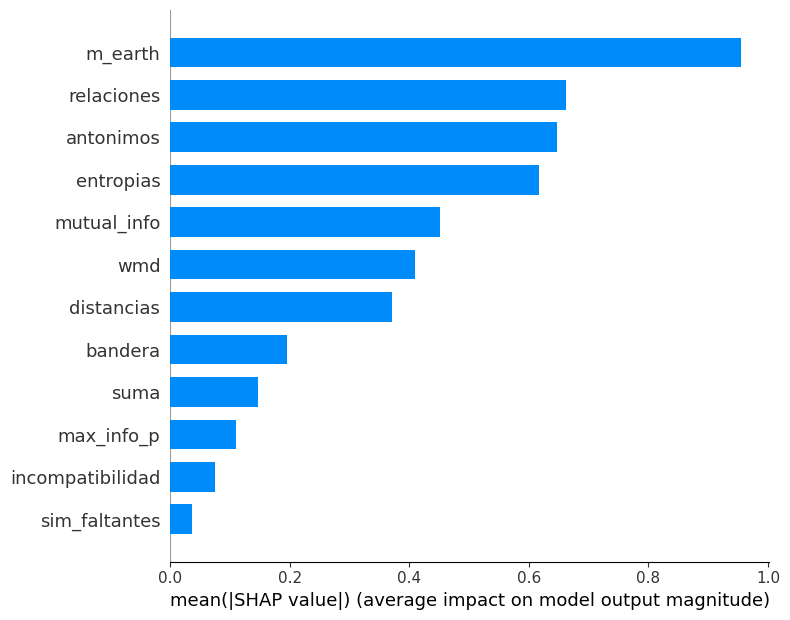

In [70]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

In [71]:
shap_values[3]

.values =
array([-0.10297473,  0.26659512,  0.51517599,  0.22184985,  0.46705297,
        0.05511818,  0.41726671,  0.7633733 , -0.04987461, -0.04757209,
       -0.24869776, -0.17929396])

.base_values =
-1.6692600506718558

.data =
array([ 0.7707799 , 37.350708  ,  0.        ,  0.68464446, 46.89102691,
        0.7707799 ,  0.        ,  1.        ,  0.77077989,  1.        ,
        4.53898144, -1.        ])

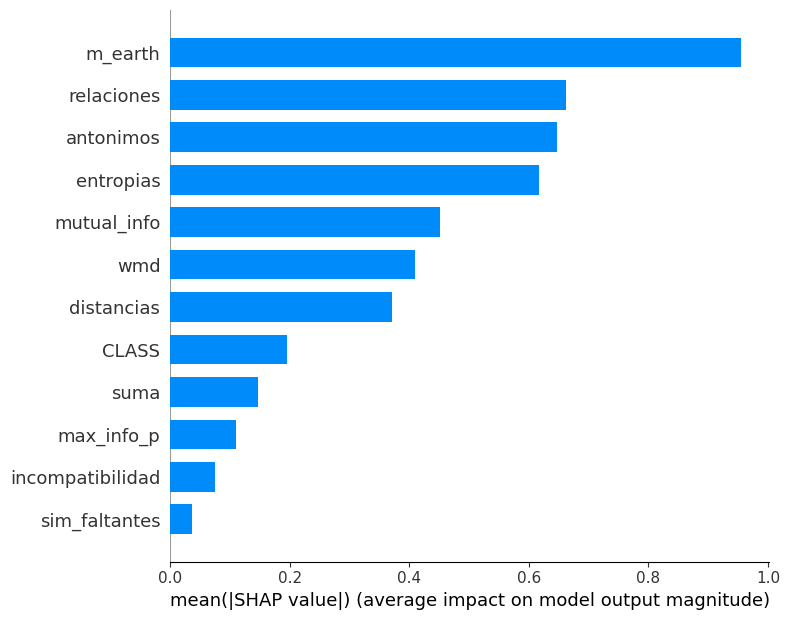

In [72]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1],plot_type="bar")

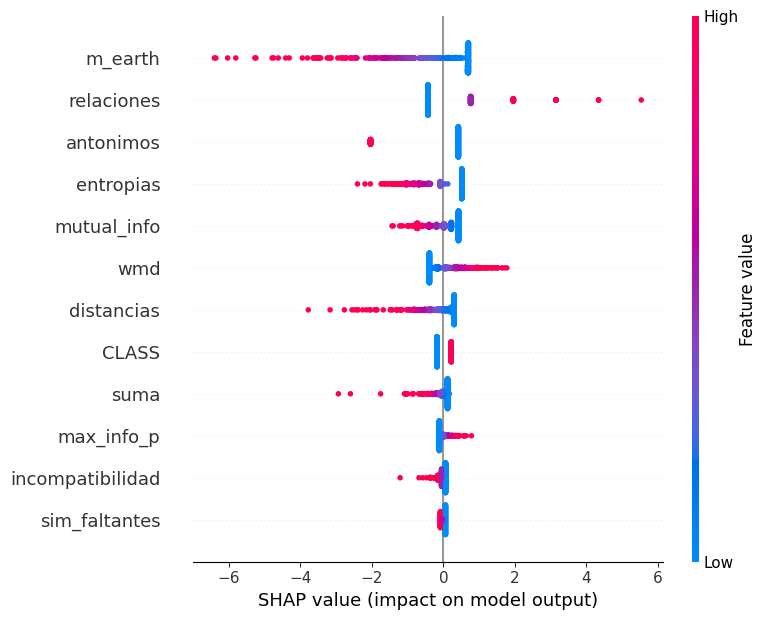

In [73]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [74]:
shap_values

.values =
array([[ 0.11773891,  0.30177016,  0.51517599, ...,  0.05814366,
        -0.39156324,  0.21913706],
       [ 0.11773891,  0.30177016,  0.51517599, ...,  0.05814366,
        -0.39156324,  0.21913706],
       [ 0.11773891,  0.30177016,  0.51517599, ...,  0.05814366,
        -0.39156324,  0.21913706],
       ...,
       [ 0.11773891,  0.30177016,  0.51517599, ...,  0.05814366,
        -0.39156324,  0.21913706],
       [ 0.02176166, -0.04605017, -0.36273584, ..., -0.04757209,
         0.31881842, -0.17929396],
       [ 0.03257804, -1.03172102, -0.89104741, ..., -0.04757209,
         0.93720886, -0.17929396]])

.base_values =
array([-1.66926005, -1.66926005, -1.66926005, -1.66926005, -1.66926005,
       -1.66926005, -1.66926005, -1.66926005, -1.66926005, -1.66926005,
       -1.66926005, -1.66926005, -1.66926005, -1.66926005, -1.66926005,
       -1.66926005, -1.66926005, -1.66926005, -1.66926005, -1.66926005,
       -1.66926005, -1.66926005, -1.66926005, -1.66926005, -1.66926005,
 

In [75]:
#pd.DataFrame(shap_values).describe()